In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_excel('/Users/zhangyuexiang/Downloads/PredictorData.xls', sheet_name='Quarterly')

In [3]:
df.head()

,yyyyq,Index,D3,D12,E3,E12,b/m,tbl,AAA,BAA,...,ntis,Rfree,infl,ltr,corpr,svar,csp,ik,CRSP_SPvw,CRSP_SPvwx
0,18711,4.61,NaN,0.26,NaN,0.4000,NaN,NaN,NaN,NaN,...,NaN,0.013712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18712,4.82,NaN,0.26,NaN,0.4000,NaN,NaN,NaN,NaN,...,NaN,0.011691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18713,4.84,NaN,0.26,NaN,0.4000,NaN,NaN,NaN,NaN,...,NaN,0.011500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18714,4.74,NaN,0.26,NaN,0.4000,NaN,NaN,NaN,NaN,...,NaN,0.020433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18721,5.04,NaN,0.27,NaN,0.4075,NaN,NaN,NaN,NaN,...,NaN,0.016935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['yyyyq', 'Index', 'D3', 'D12', 'E3', 'E12', 'b/m', 'tbl', 'AAA', 'BAA',
       'lty', 'cay', 'ntis', 'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp',
       'ik', 'CRSP_SPvw', 'CRSP_SPvwx'],
      dtype='object')

In [5]:
df['premium']=df['E3']/df['Index']-df['Rfree']

### Statistics

In [6]:
df1=df.describe()[['b/m', 'tbl', 'ntis', 'lty', 'ltr', 'premium']]
df1

,b/m,tbl,ntis,lty,ltr,premium
count,340.000000,344.000000,317.000000,348.000000,320.000000,284.000000
mean,0.604855,0.037763,0.021306,0.052823,0.014270,0.009237
std,0.258643,0.029988,0.023320,0.027782,0.043094,0.010307
min,0.125209,0.000200,-0.034357,0.019100,-0.145143,-0.008555
25%,0.453203,0.012775,0.010117,0.030250,-0.006590,0.001583
50%,0.582208,0.034000,0.019612,0.043950,0.009562,0.006628
75%,0.762780,0.053875,0.028763,0.070300,0.026726,0.016306
max,2.028478,0.154900,0.163350,0.148200,0.243682,0.041888


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 23 columns):
yyyyq         540 non-null int64
Index         540 non-null float64
D3            72 non-null float64
D12           540 non-null float64
E3            284 non-null float64
E12           540 non-null float64
b/m           340 non-null float64
tbl           344 non-null float64
AAA           348 non-null float64
BAA           348 non-null float64
lty           348 non-null float64
cay           217 non-null float64
ntis          317 non-null float64
Rfree         540 non-null float64
infl          371 non-null float64
ltr           320 non-null float64
corpr         320 non-null float64
svar          484 non-null float64
csp           263 non-null float64
ik            236 non-null float64
CRSP_SPvw     320 non-null float64
CRSP_SPvwx    320 non-null float64
premium       284 non-null float64
dtypes: float64(22), int64(1)
memory usage: 97.1 KB


In [8]:
missing=df[['b/m', 'tbl', 'ntis', 'lty', 'ltr', 'premium']].isna()
num_missing=missing.sum()
num_missing

b/m        200
tbl        196
ntis       223
lty        192
ltr        220
premium    256
dtype: int64

In [9]:
num_missing/len(df)

b/m        0.370370
tbl        0.362963
ntis       0.412963
lty        0.355556
ltr        0.407407
premium    0.474074
dtype: float64

### Visualization

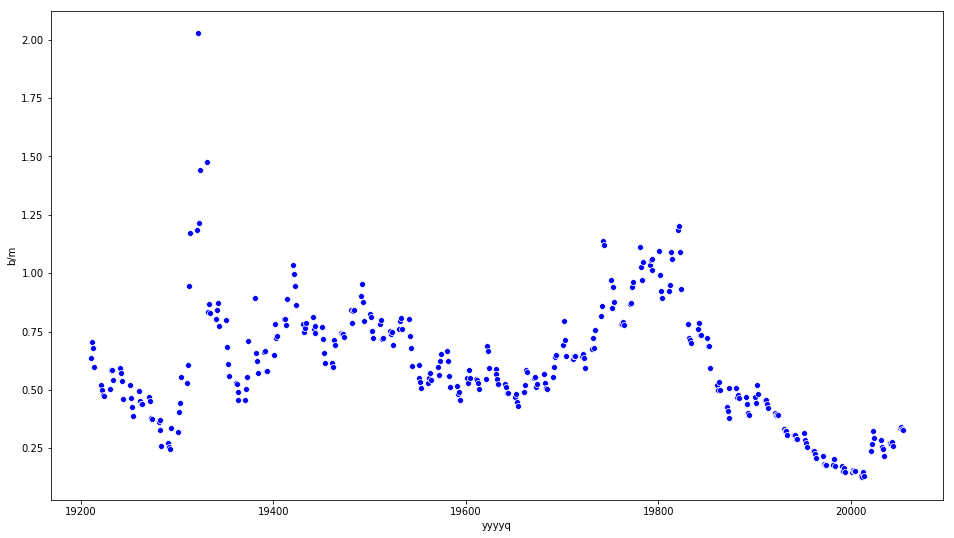

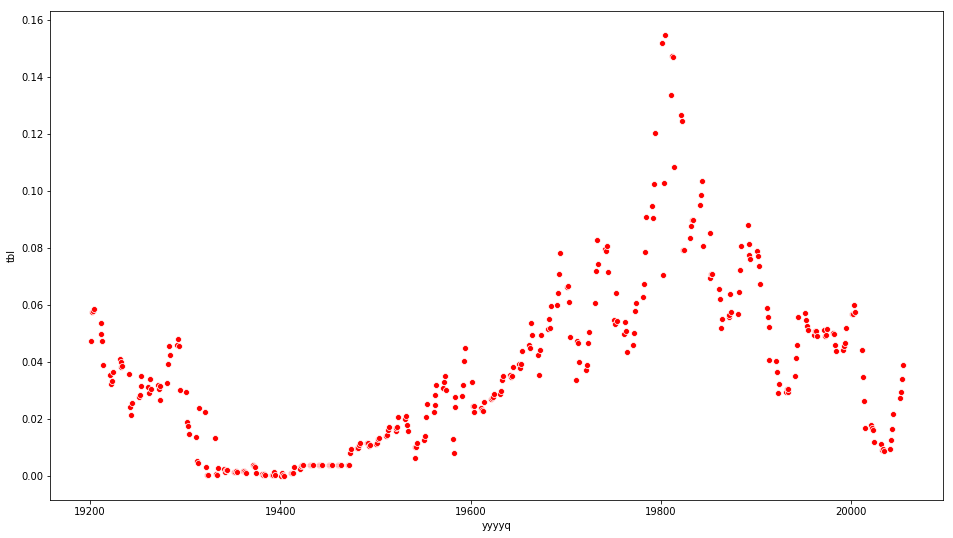

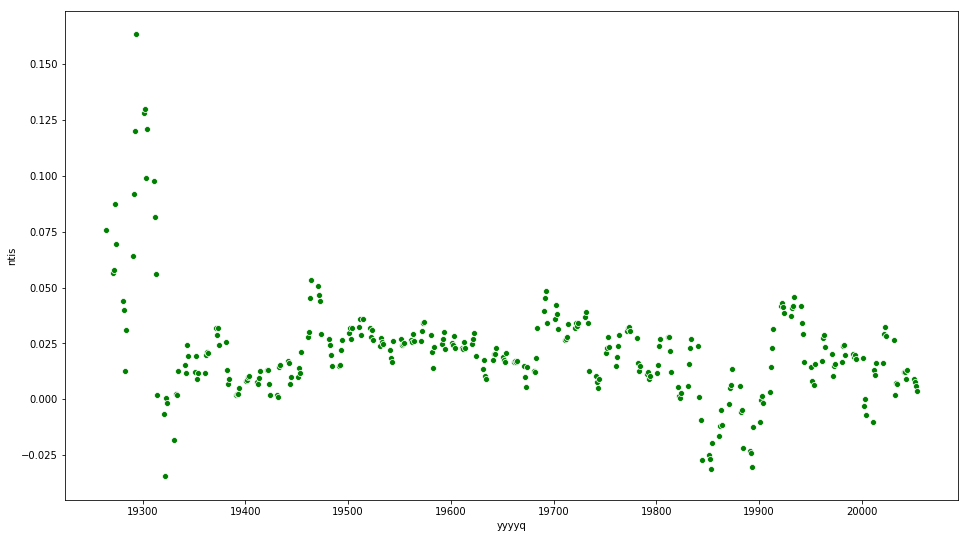

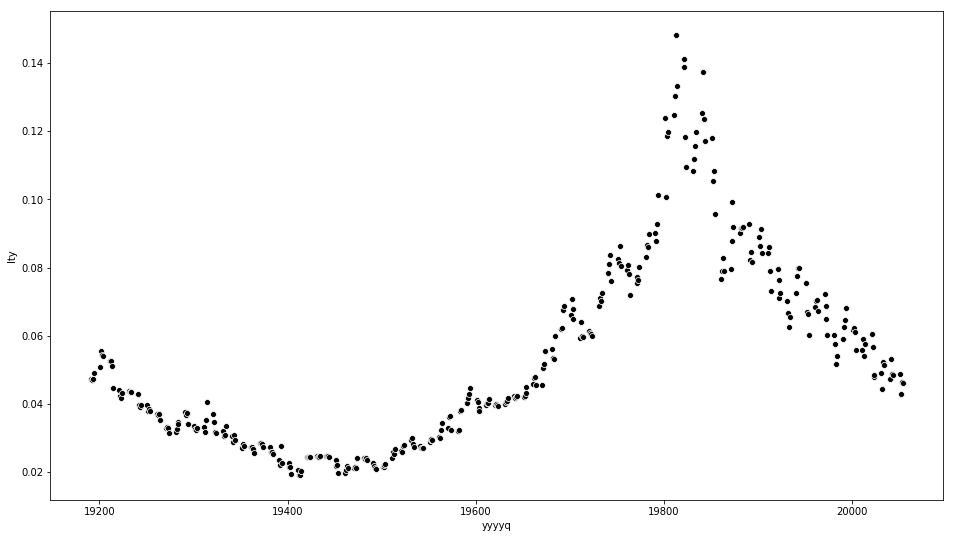

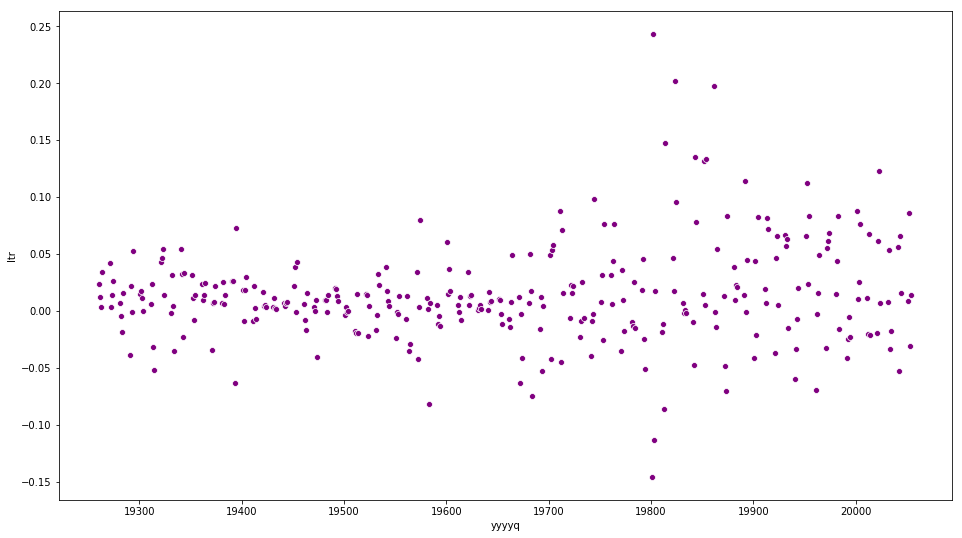

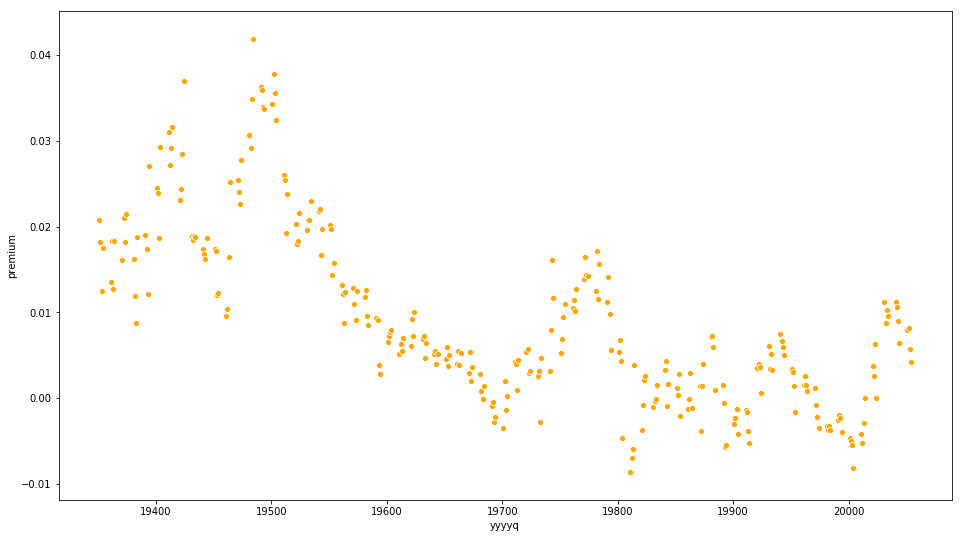

In [10]:
colors=['blue', 'red', 'green', 'black', 'purple', 'orange']
for i in range(0, 6):
    fig=plt.figure(figsize=(16,9))
    sns.scatterplot(x=df['yyyyq'], y=df[df1.columns[i]], color=colors[i])

### Correlation

In [11]:
df[['b/m', 'tbl', 'ntis', 'lty', 'ltr', 'premium']].corr()

,b/m,tbl,ntis,lty,ltr,premium
b/m,1.000000,0.079384,-0.186007,0.072426,-0.022498,0.465306
tbl,0.079384,1.000000,-0.167548,0.906322,0.028249,-0.646410
ntis,-0.186007,-0.167548,1.000000,-0.262756,-0.127159,0.187075
lty,0.072426,0.906322,-0.262756,1.000000,0.106518,-0.660960
ltr,-0.022498,0.028249,-0.127159,0.106518,1.000000,-0.124022
premium,0.465306,-0.646410,0.187075,-0.660960,-0.124022,1.000000


### Single Linear Model

In [14]:
df2=df[['b/m', 'tbl', 'ntis', 'lty', 'ltr', 'premium']]
df2.head()

,b/m,tbl,ntis,lty,ltr,premium
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df2['b/m'].isna().sum()

200

In [21]:
df2['premium'].isna().sum()

256

In [52]:
def checkna1(row):
    if np.isnan(row['b/m']) == False and np.isnan(row['premium']) == False :
        return True
    else:
        return False
    
def checkna2(row):
    if np.isnan(row['tbl']) == False and np.isnan(row['premium']) == False :
        return True
    else:
        return False
    
def checkna3(row):
    if np.isnan(row['ntis']) == False and np.isnan(row['premium']) == False :
        return True
    else:
        return False
    
def checkna4(row):
    if np.isnan(row['lty']) == False and np.isnan(row['premium']) == False :
        return True
    else:
        return False
    
def checkna5(row):
    if np.isnan(row['ltr']) == False and np.isnan(row['premium']) == False :
        return True
    else:
        return False

In [53]:
df2['b/m+']=df2.apply(checkna1, axis=1)
df2['tbl+']=df2.apply(checkna2, axis=1)
df2['ntis+']=df2.apply(checkna3, axis=1)
df2['lty+']=df2.apply(checkna4, axis=1)
df2['ltr+']=df2.apply(checkna5, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [46]:
df21=df2.loc[df2['b/m+']==True]
reg1 = LinearRegression().fit(np.array(df21['b/m']).reshape(-1,1), df21['premium'])

In [48]:
reg1.coef_

array([0.01996619])

In [54]:
df22=df2.loc[df2['tbl+']==True]
reg2 = LinearRegression().fit(np.array(df22['tbl']).reshape(-1,1), df22['premium'])

In [55]:
reg2.coef_

array([-0.20971932])

In [56]:
df23=df2.loc[df2['ntis+']==True]
reg3 = LinearRegression().fit(np.array(df23['ntis']).reshape(-1,1), df23['premium'])

In [57]:
reg3.coef_

array([0.13120365])

In [59]:
df24=df2.loc[df2['lty+']==True]
reg4 = LinearRegression().fit(np.array(df24['lty']).reshape(-1,1), df24['premium'])

In [60]:
reg4.coef_

array([-0.2296179])

In [61]:
df25=df2.loc[df2['ltr+']==True]
reg5 = LinearRegression().fit(np.array(df25['ltr']).reshape(-1,1), df25['premium'])

In [62]:
reg5.coef_

array([-0.02854091])